In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system

# PD_median_std_all_datasets.csv Dataset

In [35]:
data = pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_median_std_all_datasets.csv')

In [36]:
PD_data_conc= data[data.Status != 0.0]

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Count'>

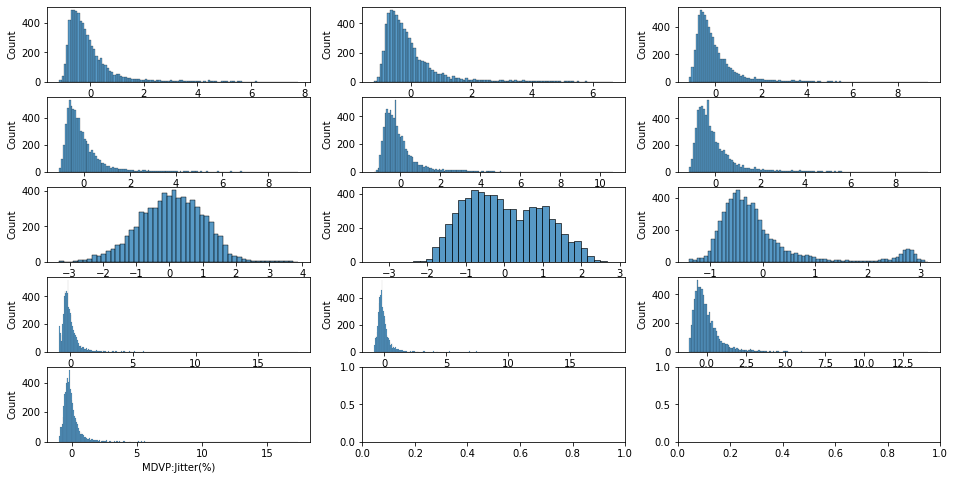

In [37]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16))
sns.histplot(PD_data_conc['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_data_conc['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_data_conc['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_data_conc['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_data_conc['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(PD_data_conc['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_data_conc['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_data_conc['DFA'],ax=ax[2,1]) 
sns.histplot(PD_data_conc['PPE'],ax=ax[2,2])
sns.histplot(PD_data_conc['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_data_conc['Jitter:PPQ5'],ax=ax[3,1]) 
sns.histplot(PD_data_conc['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_data_conc['MDVP:Jitter(%)'],ax=ax[4,0]) 

# PD_remove_std_all_datasets.csv Dataset

In [38]:
data2 = pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_remove_std_all_datasets.csv')

In [39]:
PD_data_conc2= data2[data2.Status != 0.0]

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Count'>

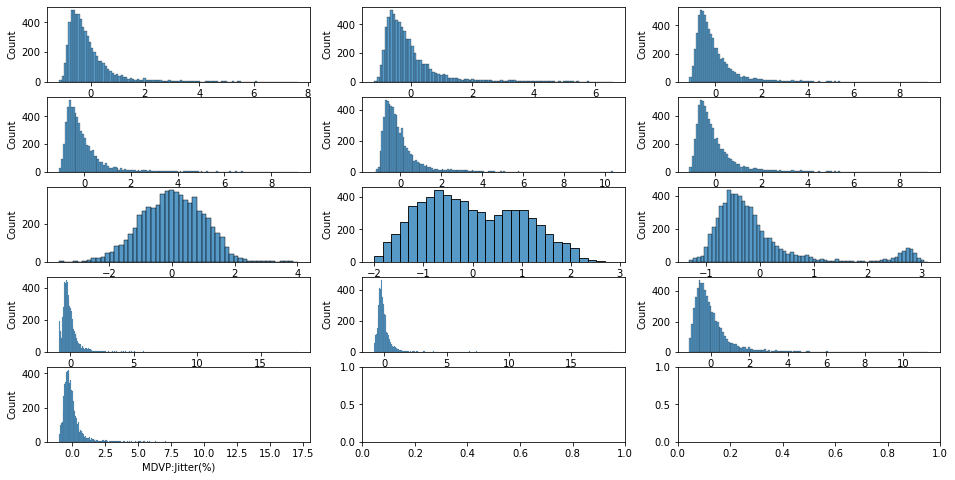

In [40]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16))
sns.histplot(PD_data_conc2['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_data_conc2['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_data_conc2['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_data_conc2['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_data_conc2['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(PD_data_conc2['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_data_conc2['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_data_conc2['DFA'],ax=ax[2,1]) 
sns.histplot(PD_data_conc2['PPE'],ax=ax[2,2])
sns.histplot(PD_data_conc2['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_data_conc2['Jitter:PPQ5'],ax=ax[3,1]) 
sns.histplot(PD_data_conc2['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_data_conc2['MDVP:Jitter(%)'],ax=ax[4,0]) 

# PD_median_std_PSF.csv Dataset 

In [47]:
data3 = pd.read_csv('/Users/halo/AI4Good Practice/Project/parkinsons.data.csv')

In [48]:
PD_data1= data3[data3.status != 0] 

In [49]:
PD_data1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,phon_R01_S44_2,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,...,0.02518,0.00488,24.412,1,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,phon_R01_S44_3,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,...,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,...,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710


<AxesSubplot:xlabel='MDVP:Flo(Hz)', ylabel='Count'>

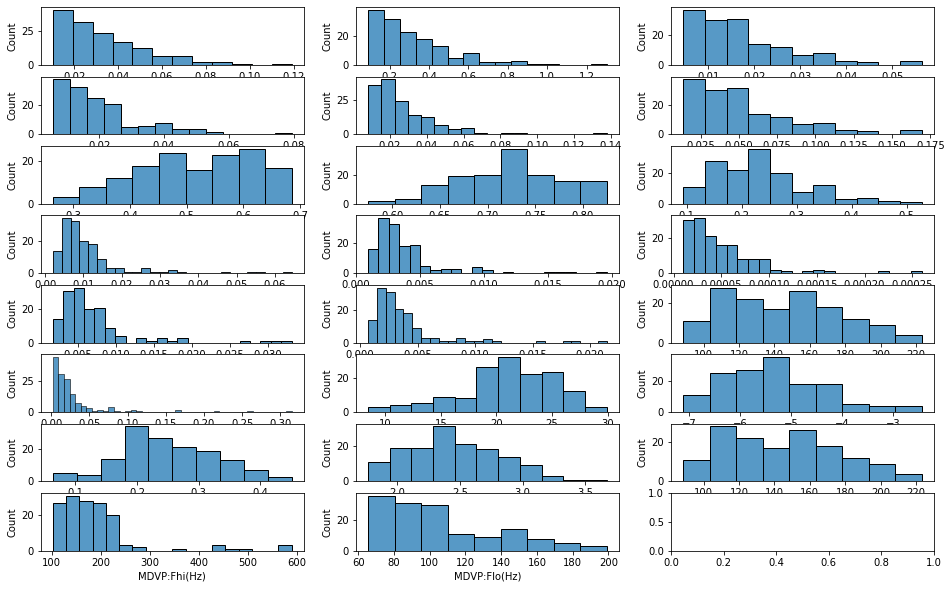

In [50]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16))
sns.histplot(PD_data1['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_data1['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_data1['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_data1['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_data1['MDVP:APQ'],ax=ax[1,1]) 
sns.histplot(PD_data1['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_data1['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_data1['DFA'],ax=ax[2,1]) 
sns.histplot(PD_data1['PPE'],ax=ax[2,2])
sns.histplot(PD_data1['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_data1['MDVP:PPQ'],ax=ax[3,1]) 
sns.histplot(PD_data1['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_data1['MDVP:Jitter(%)'],ax=ax[4,0]) 
sns.histplot(PD_data1['MDVP:RAP'],ax=ax[4,1]) 
sns.histplot(PD_data1['MDVP:Fo(Hz)'],ax=ax[4,2]) 
sns.histplot(PD_data1['NHR'],ax=ax[5,0]) 
sns.histplot(PD_data1['HNR'],ax=ax[5,1]) 
sns.histplot(PD_data1['spread1'],ax=ax[5,2]) 
sns.histplot(PD_data1['spread2'],ax=ax[6,0]) 
sns.histplot(PD_data1['D2'],ax=ax[6,1]) 
sns.histplot(PD_data1['MDVP:Fo(Hz)'],ax=ax[6,2])
sns.histplot(PD_data1['MDVP:Fhi(Hz)'],ax=ax[7,0]) 
sns.histplot(PD_data1['MDVP:Flo(Hz)'],ax=ax[7,1]) 

# PD_median_std_PSF.csv Dataset

In [66]:
data4 = pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_median_std_PSF.csv')

In [67]:
PD_dataset1= data4[data4.Status != 0] 

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Count'>

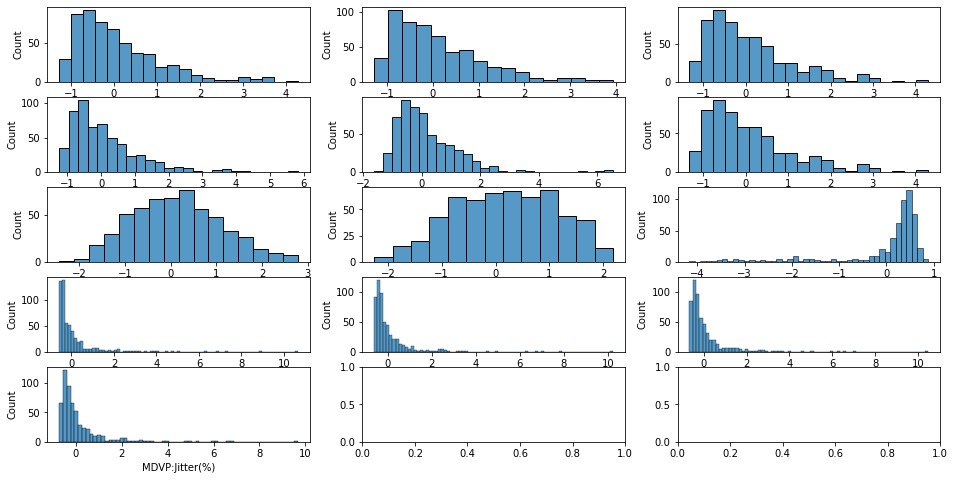

In [68]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16))
sns.histplot(PD_dataset1['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_dataset1['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_dataset1['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_dataset1['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_dataset1['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(PD_dataset1['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_dataset1['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_dataset1['DFA'],ax=ax[2,1]) 
sns.histplot(PD_dataset1['PPE'],ax=ax[2,2])
sns.histplot(PD_dataset1['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_dataset1['Jitter:PPQ5'],ax=ax[3,1]) 
sns.histplot(PD_dataset1['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_dataset1['MDVP:Jitter(%)'],ax=ax[4,0]) 

# PD_remove_std_PSF.csv Dataset

In [76]:
data5=pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_remove_std_PSF.csv')

In [77]:
 PD_dataset2=data5[data5.Status != 0] 

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Count'>

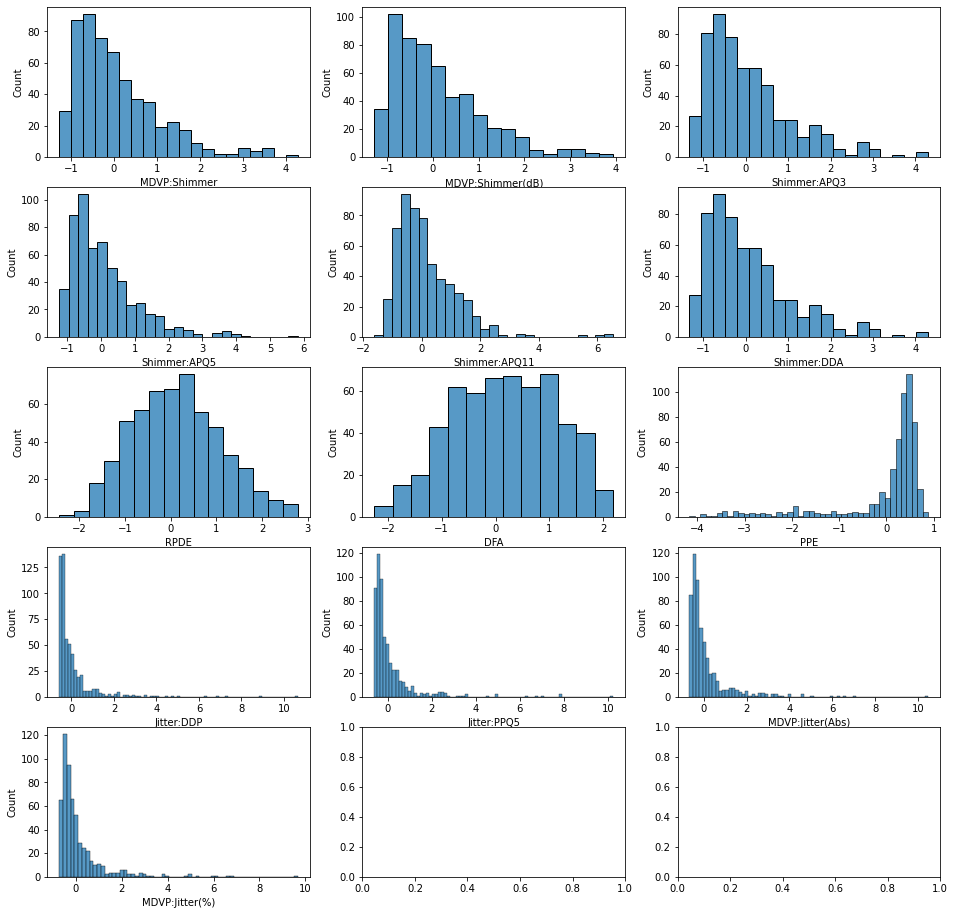

In [161]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16)) 
sns.histplot(PD_dataset2['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_dataset2['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_dataset2['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_dataset2['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_dataset2['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(PD_dataset2['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_dataset2['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_dataset2['DFA'],ax=ax[2,1]) 
sns.histplot(PD_dataset2['PPE'],ax=ax[2,2])
sns.histplot(PD_dataset2['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_dataset2['Jitter:PPQ5'],ax=ax[3,1]) 
sns.histplot(PD_dataset2['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_dataset2['MDVP:Jitter(%)'],ax=ax[4,0])

# PD_median_std_TPU.csv Dataset

In [82]:
data6=pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_median_std_TPU.csv')

In [83]:
 PD_dataset3=data6[data6.Status != 0] 

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Count'>

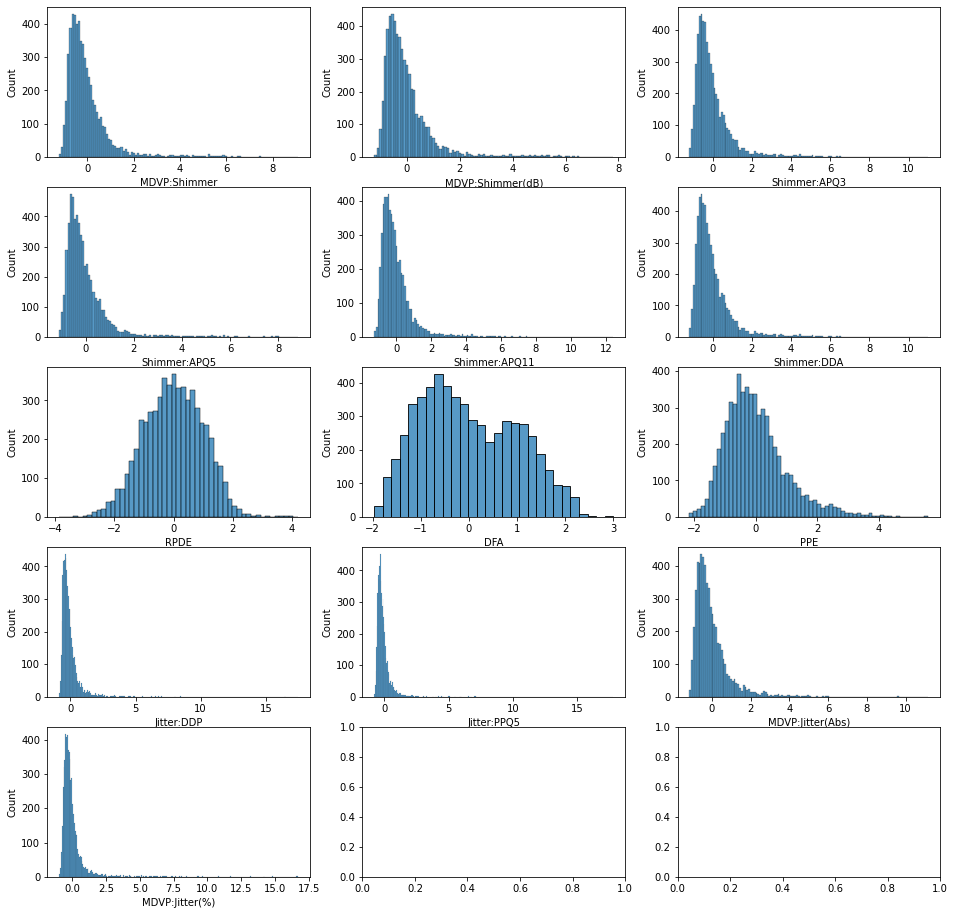

In [160]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16)) 
sns.histplot(PD_dataset3['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_dataset3['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_dataset3['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_dataset3['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_dataset3['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(PD_dataset3['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_dataset3['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_dataset3['DFA'],ax=ax[2,1]) 
sns.histplot(PD_dataset3['PPE'],ax=ax[2,2])
sns.histplot(PD_dataset3['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_dataset3['Jitter:PPQ5'],ax=ax[3,1]) 
sns.histplot(PD_dataset3['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_dataset3['MDVP:Jitter(%)'],ax=ax[4,0])

# PD_remove_std_TPU.csv Dataset

In [85]:
data7=pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_remove_std_TPU.csv')

In [86]:
 PD_dataset4=data7[data7.Status != 0] 

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Count'>

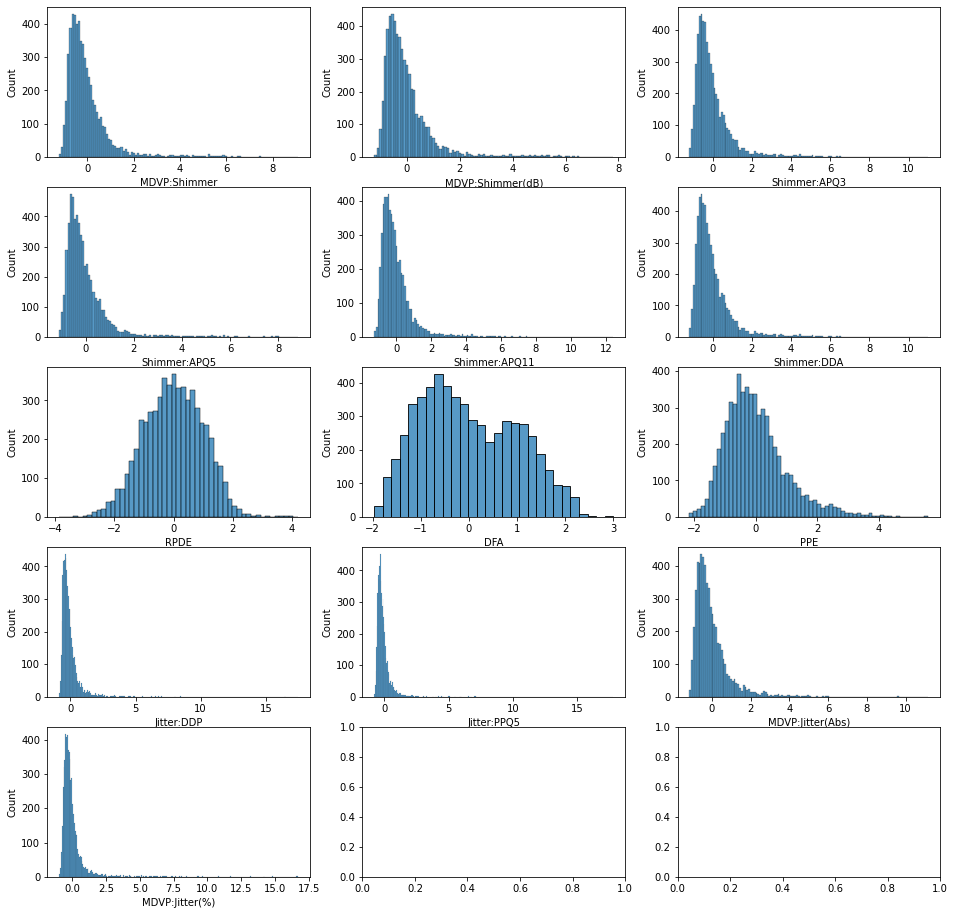

In [154]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16)) 
sns.histplot(PD_dataset4['MDVP:Shimmer'],ax=ax[0,0]) 
sns.histplot(PD_dataset4['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(PD_dataset4['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(PD_dataset4['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(PD_dataset4['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(PD_dataset4['Shimmer:DDA'],ax=ax[1,2])
sns.histplot(PD_dataset4['RPDE'],ax=ax[2,0]) 
sns.histplot(PD_dataset4['DFA'],ax=ax[2,1]) 
sns.histplot(PD_dataset4['PPE'],ax=ax[2,2])
sns.histplot(PD_dataset4['Jitter:DDP'],ax=ax[3,0]) 
sns.histplot(PD_dataset4['Jitter:PPQ5'],ax=ax[3,1]) 
sns.histplot(PD_dataset4['MDVP:Jitter(Abs)'],ax=ax[3,2])
sns.histplot(PD_dataset4['MDVP:Jitter(%)'],ax=ax[4,0])

# Encoded ALS Dataset.csv Dataset

In [111]:
data8=pd.read_csv('/Users/halo/AI4Good Practice/Project/Encoded ALS Dataset.csv')

In [112]:
data8 = data8.drop(labels=range(30, 38), axis=0)

In [126]:
data8 = data8.rename({'Status (0=control, 1=ALS)': 'status', 'Local Jitter ':'Jitter'}, axis=1)

In [127]:
ALS_dataset=data8[data8.status != 0] 

In [152]:
#ALS_dataset

<AxesSubplot:xlabel='Jitter:PPQ5', ylabel='Count'>

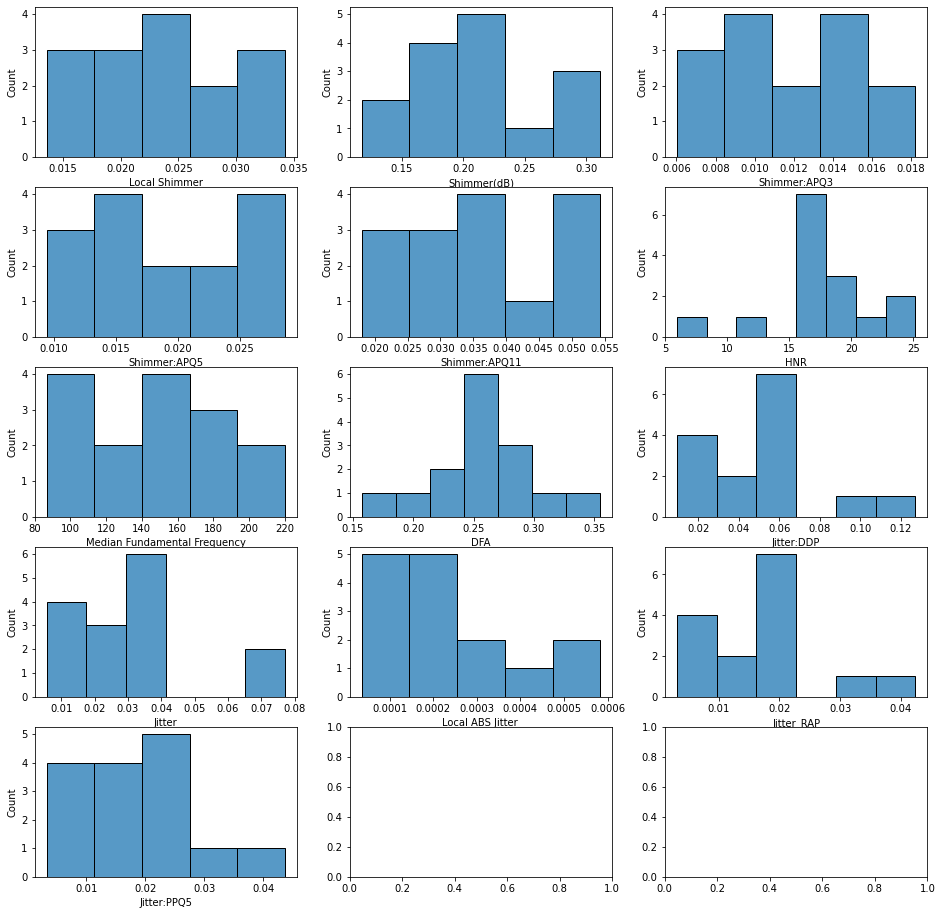

In [155]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16))
sns.histplot(ALS_dataset['Local Shimmer'],ax=ax[0,0]) 
sns.histplot(ALS_dataset['Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(ALS_dataset['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(ALS_dataset['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(ALS_dataset['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(ALS_dataset['HNR'],ax=ax[1,2])
sns.histplot(ALS_dataset['Median Fundamental Frequency'],ax=ax[2,0]) 
sns.histplot(ALS_dataset['DFA'],ax=ax[2,1]) 
sns.histplot(ALS_dataset['Jitter:DDP'],ax=ax[2,2])
sns.histplot(ALS_dataset['Jitter'],ax=ax[3,0]) 
sns.histplot(ALS_dataset['Local ABS Jitter '],ax=ax[3,1]) 
sns.histplot(ALS_dataset['Jitter_RAP'],ax=ax[3,2])
sns.histplot(ALS_dataset['Jitter:PPQ5'],ax=ax[4,0])

# Cerebral Palsy Encoded Dataset.csv

In [156]:
data9=pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/Cerebral Palsy Encoded Dataset.csv')

In [157]:
data9 = data9.rename({'Status (0=control, 1=CP)': 'status'}, axis=1)

In [158]:
#data9

In [141]:
CP_dataset=data9[data9.status != 0] 

<AxesSubplot:xlabel='Jitter:PPQ5', ylabel='Count'>

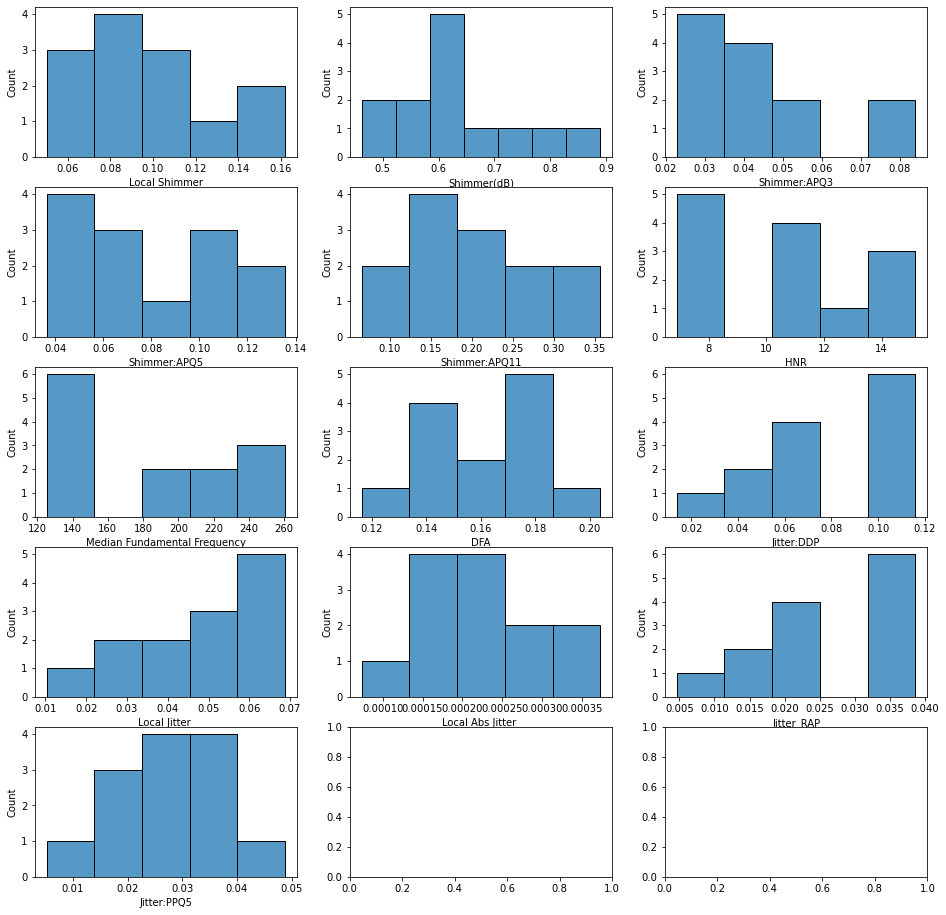

In [159]:
#Drawing histograms of the different features
fig, ax = plt.subplots(5,3,figsize=(16,16)) 
sns.histplot(CP_dataset['Local Shimmer'],ax=ax[0,0]) 
sns.histplot(CP_dataset['Shimmer(dB)'],ax=ax[0,1]) 
sns.histplot(CP_dataset['Shimmer:APQ3'],ax=ax[0,2]) 
sns.histplot(CP_dataset['Shimmer:APQ5'],ax=ax[1,0]) 
sns.histplot(CP_dataset['Shimmer:APQ11'],ax=ax[1,1]) 
sns.histplot(CP_dataset['HNR'],ax=ax[1,2])
sns.histplot(CP_dataset['Median Fundamental Frequency'],ax=ax[2,0]) 
sns.histplot(CP_dataset['DFA'],ax=ax[2,1]) 
sns.histplot(CP_dataset['Jitter:DDP'],ax=ax[2,2])
sns.histplot(CP_dataset['Local Jitter '],ax=ax[3,0]) 
sns.histplot(CP_dataset['Local Abs Jitter '],ax=ax[3,1]) 
sns.histplot(CP_dataset['Jitter_RAP'],ax=ax[3,2])
sns.histplot(CP_dataset['Jitter:PPQ5'],ax=ax[4,0])